In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image

11490434/11490434 [==============================] - 0s 0us/step


5

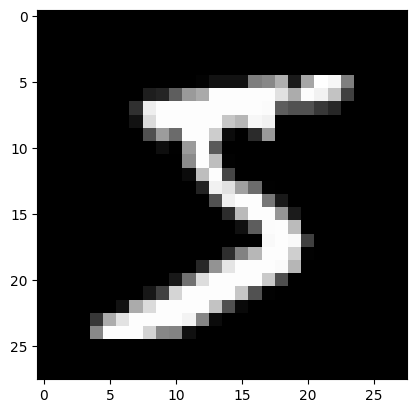

In [3]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape
X_test.shape

single_image = X_train[0]
single_image.shape
plt.imshow(single_image, cmap='gray')

y_train.shape

X_train.min()
X_train.max()

X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

X_train_scaled.min()
X_train_scaled.max()

y_train[0]

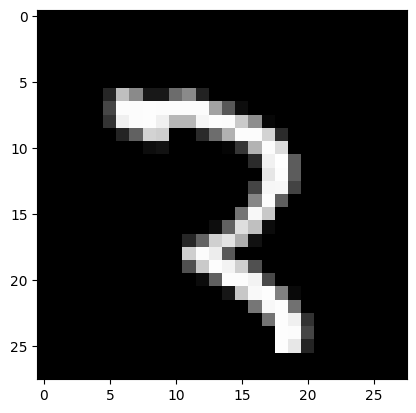

In [4]:
y_train_onehot = utils.to_categorical(y_train, 10)
y_test_onehot = utils.to_categorical(y_test, 10)

type(y_train_onehot)

y_train_onehot.shape

single_image = X_train[500]
plt.imshow(single_image, cmap='gray')

y_train_onehot[500]

X_train_scaled = X_train_scaled.reshape(-1, 28, 28, 1)
X_test_scaled = X_test_scaled.reshape(-1, 28, 28, 1)

In [5]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),activation='relu'))
model.add(layers.Conv2D(filters=64,kernel_size=(5,5),strides=(1,1),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(15,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_onehot, epochs=5, batch_size=64,
          validation_data=(X_test_scaled, y_test_onehot))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 20)                128020    
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                        

In [11]:
metrics = pd.DataFrame(model.history.history)

metrics.head()

metrics[['accuracy', 'val_accuracy']].plot()

metrics[['loss', 'val_loss']].plot()

x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)
print(confusion_matrix(y_test, x_test_predictions))
print(classification_report(y_test, x_test_predictions))

Anbuselvan 212223240008
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



1/1 [==============================] - 0s 80ms/step
[5]
1/1 [==============================] - 0s 73ms/step
Anbuselvan 212223240008
[5]


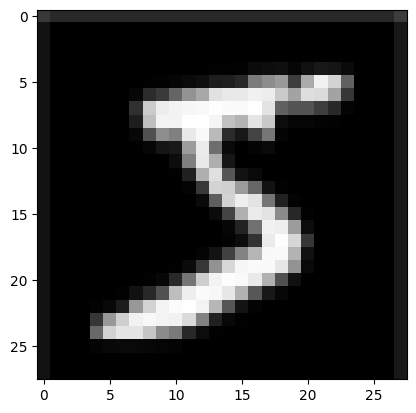

In [12]:
img = image.load_img('/content/Screenshot 2024-03-10 081635.png')

type(img)


img = image.load_img('/content/Screenshot 2024-03-10 081635.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor, (28, 28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy() / 255.0

x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1, 28, 28, 1)),
    axis=1)

print(x_single_prediction)

plt.imshow(img_28_gray_scaled.reshape(28, 28), cmap='gray')
img_28_gray_inverted = 255.0 - img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy() / 255.0

x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1, 28, 28, 1)),
    axis=1)

print('Anbuselvan 212223240008')
print(x_single_prediction)
